In [2]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

import random
from itertools import count
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation

# hgamma

In [2]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4/0_hydr_noo/scenarios'
h1_nsd = np.zeros((100,49,180)) # gamma * surf_dist
h2_nsd = np.zeros((100,49,180)) # surf_area_dist
hgamma_nsd = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_nsd[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m3 to cm-3
            h2_nsd[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m3 to cm-3
            hgamma_nsd[sce_index, t_index,:] = h1_nsd[sce_index, t_index,:]/h2_nsd[sce_index, t_index,:]

In [3]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/wsd_2d_so4/0_hydr_noo/scenarios'
h1_wsd = np.zeros((100,49,180)) # gamma * surf_dist
h2_wsd = np.zeros((100,49,180)) # surf_area_dist
hgamma_wsd = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_wsd[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m3 to cm-3
            h2_wsd[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m3 to cm-3
            hgamma_wsd[sce_index, t_index,:] = h1_wsd[sce_index, t_index,:]/h2_wsd[sce_index, t_index,:]
            

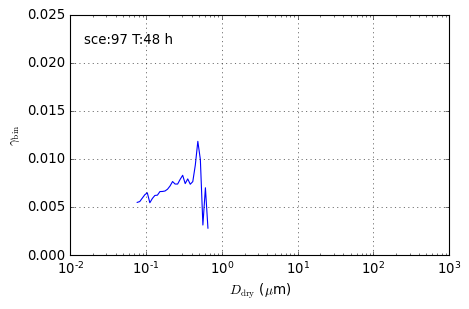

In [8]:
for i in range(49):
    plt.figure(figsize=(6,4))

    plt.cla()
    plt.plot(diam, hgamma_wsd[93, 37,:])
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,0.025)
    plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    plt.ylabel(r'$\gamma_{\rm bin}$')
    plt.text(0.015, 0.022, r'sce:%d T:%d h '% (97, i))
    plt.grid()
    plt.tight_layout(pad=1.0)
#     display(fig)

    clear_output(wait = True)
    plt.pause(0.1)

In [3]:
s = pd.Series(['no3','so4','wi','oin','na','cl','oc','soa','bc','nh4'])
print(s)

0    no3
1    so4
2     wi
3    oin
4     na
5     cl
6     oc
7    soa
8     bc
9    nh4
dtype: object


In [5]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nsd_2d_so4_less/0_hydr_noo/scenarios/scenario_0086'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

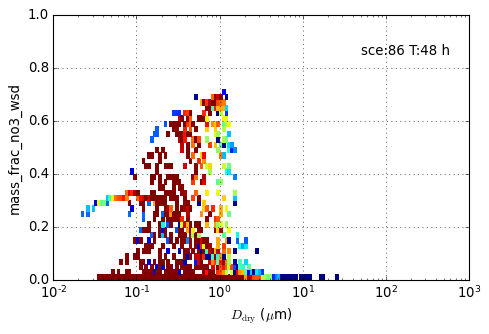

In [6]:
X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(49):
    plt.figure(figsize=(6,4))

    plt.cla()
    plt.pcolormesh (X, Y, nmass_frac_dist[0,i,:,:], 
                    norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.text(50, 0.85, r'sce:%d T:%d h '% (86, i))
    plt.grid()
    plt.tight_layout(pad=1.0)
    plt.xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    plt.ylabel("mass_frac_" + s[0] + "_wsd")
#     display(fig)

    clear_output(wait = True)
    plt.pause(1e-10)